<center><h1>DSCI-552 HW_3</h1></center>
<br>
<center><font size="4">Name: Jiade Song    GitHubID: JiadeSong     USCID: 9019610285 </font></center>

<center><font size="4">1. Time Series Classification Part 1: Feature Creation/Extraction</font></center>

In [1]:
import pandas as pd
import numpy as np
import glob
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df_var = []
path_end = ['bending1','bending2','cycling','lying','sitting','standing','walking']
path_start = r'../../data/AReM/'

for i in path_end:
    path_total = path_start+i
    all_data_files = glob.glob(path_total + "/*.csv")
    for f in all_data_files:
        df_var.append(i+ '_' + f[(f.find('set')+3):-4])
        locals()[i+ '_' + f[(f.find('set')+3):-4]] = pd.read_csv(f,header=4).rename(columns \
                                                                = {'# Columns: time':'time'})
# Manually cleaned dataset9 and 14 by hand.              
column_list = ["time", "avg_rss12", "var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"," "]
bending2_4_0 = pd.read_csv('../../data/AReM/bending2/dataset4.csv',delimiter=' ', skiprows=5, header=None)
bending2_4_0.columns=column_list
bending2_4 = bending2_4_0[column_list[0:7]]

###    (B)

In [3]:
train_dataset = []
test_dataset = []
train_y = []
test_y =[]
for i in df_var:
#      print(i[(i.find('_')+1):])
    if i[:(i.find('_'))] in ['bending1','bending2']:
        if int(i[(i.find('_')+1):]) <= 2:
            test_dataset.append(i)
            test_y.append(i[:(i.find('ing')+3)])
        else:
            train_dataset.append(i)
            train_y.append(i[:(i.find('ing')+3)])
    else:
        if int(i[(i.find('_')+1):]) <= 3:
            test_dataset.append(i)
            test_y.append(i[:(i.find('ing')+3)])
        else:
            train_dataset.append(i)
            train_y.append(i[:(i.find('ing')+3)])
            
train_table = pd.DataFrame(columns=['dataset_name','y'])
train_table['dataset_name'] = train_dataset
train_table['y'] = train_y

test_table = pd.DataFrame(columns=['dataset_name','y'])
test_table['dataset_name'] = test_dataset
test_table['y'] = test_y

test_table

,dataset_name,y
0,bending1_1,bending
1,bending1_2,bending
2,bending2_1,bending
3,bending2_2,bending
4,cycling_1,cycling
5,cycling_2,cycling
6,cycling_3,cycling
7,lying_1,lying
8,lying_2,lying
9,lying_3,lying


### C (i)

    Answer: Min, Max, Std, Mean, Peak, Skewness, Kurtosis, Frequency, Seasonality. 

https://www.researchgate.net/publication/312184476_Clustering_algorithm-based_fault_diagnosis/figures?lo=1

### C (ii)

In [4]:
New_dataset_col_name = ['dataset_name']
feature_name = ['min','max','mean','median','std','1st_Quartile','3rd_Quartile']
for i in column_list[1:7]:
    for j in feature_name:
        New_dataset_col_name.append(j+'_'+i)

In [5]:
New_dataset = pd.DataFrame(columns=New_dataset_col_name)

for i in df_var:
    row=[i]
    for j in column_list[1:7]:
        this_col = locals()[i][j]
        features = [min(this_col), max(this_col),this_col.mean(),this_col.median()\
                   ,this_col.std(),np.percentile(this_col, 25),np.percentile(this_col, 75)]
        [row.append(n) for n in features]
    df_length = len(New_dataset)
    New_dataset.loc[df_length] = row

In [6]:
New_dataset

,dataset_name,min_avg_rss12,max_avg_rss12,mean_avg_rss12,median_avg_rss12,std_avg_rss12,1st_Quartile_avg_rss12,3rd_Quartile_avg_rss12,min_var_rss12,max_var_rss12,...,std_avg_rss23,1st_Quartile_avg_rss23,3rd_Quartile_avg_rss23,min_var_rss23,max_var_rss23,mean_var_rss23,median_var_rss23,std_var_rss23,1st_Quartile_var_rss23,3rd_Quartile_var_rss23
0,bending1_7,36.25,48.00,43.969125,44.500,1.618364,43.31,44.67,0.0,1.50,...,3.318301,20.5000,23.75,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
1,bending1_6,37.00,48.00,43.454958,43.250,1.386098,42.50,45.00,0.0,1.58,...,2.488862,22.2500,24.00,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
2,bending1_4,33.00,47.75,42.179813,43.500,3.670666,39.15,45.00,0.0,3.00,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
3,bending1_5,33.00,45.75,41.678063,41.750,2.243490,41.33,42.75,0.0,2.83,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
4,bending1_1,37.25,45.00,40.624792,40.500,1.476967,39.25,42.00,0.0,1.30,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,walking_12,19.75,45.50,34.322750,35.250,4.752477,31.00,38.00,0.0,13.47,...,3.119856,13.5000,17.75,0.00,9.67,3.432562,3.200,1.732727,2.1575,4.5650
84,walking_15,19.25,44.00,34.473188,35.000,4.796705,31.25,38.00,0.0,13.86,...,3.156320,13.7300,17.75,0.43,9.00,3.340458,3.090,1.699114,2.1200,4.3750
85,walking_14,23.50,46.25,34.873229,35.250,4.531720,31.75,38.25,0.0,14.82,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.270,1.690960,2.1700,4.5000
86,walking_8,18.33,45.75,34.599875,35.125,4.731790,31.50,38.00,0.0,15.37,...,2.905688,14.0000,18.25,0.00,8.86,3.289542,3.015,1.680170,2.1200,4.2600


### C (iii)
    Std of each time-domain features.

In [7]:
New_dataset_std = []
for i in New_dataset_col_name[1:]:
    New_dataset_std.append(round(New_dataset[i].std(),2))
New_dataset_std_df = pd.DataFrame(columns=New_dataset_col_name[1:])
New_dataset_std_df.loc[0] = New_dataset_std
New_dataset_std_df.T
# values represent the stds.

,0
min_avg_rss12,9.57
max_avg_rss12,4.39
mean_avg_rss12,5.34
median_avg_rss12,5.44
std_avg_rss12,1.77
1st_Quartile_avg_rss12,6.15
3rd_Quartile_avg_rss12,5.14
min_var_rss12,0.00
max_var_rss12,5.06
mean_var_rss12,1.57


    Bootstrap std CI of each time-domain features.

In [8]:
New_dataset_std_bs_lower = []
New_dataset_std_bs_upper = []
for i in New_dataset_col_name[1:]:
    bs_results = bs.bootstrap(np.array(New_dataset[i]), stat_func=bs_stats.std, alpha=0.1)
    New_dataset_std_bs_lower.append(round(bs_results.lower_bound,3))
    New_dataset_std_bs_upper.append(round(bs_results.upper_bound,3))
New_dataset_std_bs_df = pd.DataFrame(columns=New_dataset_col_name[1:])
New_dataset_std_bs_df.loc[0] = New_dataset_std_bs_lower
New_dataset_std_bs_df.loc[1] = New_dataset_std_bs_upper
New_dataset_std_bs_df.T
# "0" column represent CI lower bound and "1" column represent CI upper bound.

,0,1
min_avg_rss12,8.302,10.816
max_avg_rss12,3.481,5.432
mean_avg_rss12,4.761,5.923
median_avg_rss12,4.849,6.044
std_avg_rss12,1.581,1.960
1st_Quartile_avg_rss12,5.623,6.687
3rd_Quartile_avg_rss12,4.400,5.921
min_var_rss12,0.000,0.000
max_var_rss12,4.698,5.472
mean_var_rss12,1.433,1.743


### C (iv)

In [9]:
New_dataset_w_y = New_dataset
New_dataset_w_y['y'] = np.nan
for i in range(len(New_dataset_w_y)):
    New_dataset_w_y['y'][i] = New_dataset_w_y['dataset_name'][i][:(New_dataset_w_y['dataset_name'][i].find('_')-1)]
New_dataset_w_y

,dataset_name,min_avg_rss12,max_avg_rss12,mean_avg_rss12,median_avg_rss12,std_avg_rss12,1st_Quartile_avg_rss12,3rd_Quartile_avg_rss12,min_var_rss12,max_var_rss12,...,1st_Quartile_avg_rss23,3rd_Quartile_avg_rss23,min_var_rss23,max_var_rss23,mean_var_rss23,median_var_rss23,std_var_rss23,1st_Quartile_var_rss23,3rd_Quartile_var_rss23,y
0,bending1_7,36.25,48.00,43.969125,44.500,1.618364,43.31,44.67,0.0,1.50,...,20.5000,23.75,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300,bending
1,bending1_6,37.00,48.00,43.454958,43.250,1.386098,42.50,45.00,0.0,1.58,...,22.2500,24.00,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700,bending
2,bending1_4,33.00,47.75,42.179813,43.500,3.670666,39.15,45.00,0.0,3.00,...,30.4575,36.33,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000,bending
3,bending1_5,33.00,45.75,41.678063,41.750,2.243490,41.33,42.75,0.0,2.83,...,28.4575,31.25,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000,bending
4,bending1_1,37.25,45.00,40.624792,40.500,1.476967,39.25,42.00,0.0,1.30,...,33.0000,36.00,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,walking_12,19.75,45.50,34.322750,35.250,4.752477,31.00,38.00,0.0,13.47,...,13.5000,17.75,0.00,9.67,3.432562,3.200,1.732727,2.1575,4.5650,walkin
84,walking_15,19.25,44.00,34.473188,35.000,4.796705,31.25,38.00,0.0,13.86,...,13.7300,17.75,0.43,9.00,3.340458,3.090,1.699114,2.1200,4.3750,walkin
85,walking_14,23.50,46.25,34.873229,35.250,4.531720,31.75,38.25,0.0,14.82,...,13.7500,18.00,0.00,9.51,3.424646,3.270,1.690960,2.1700,4.5000,walkin
86,walking_8,18.33,45.75,34.599875,35.125,4.731790,31.50,38.00,0.0,15.37,...,14.0000,18.25,0.00,8.86,3.289542,3.015,1.680170,2.1200,4.2600,walkin


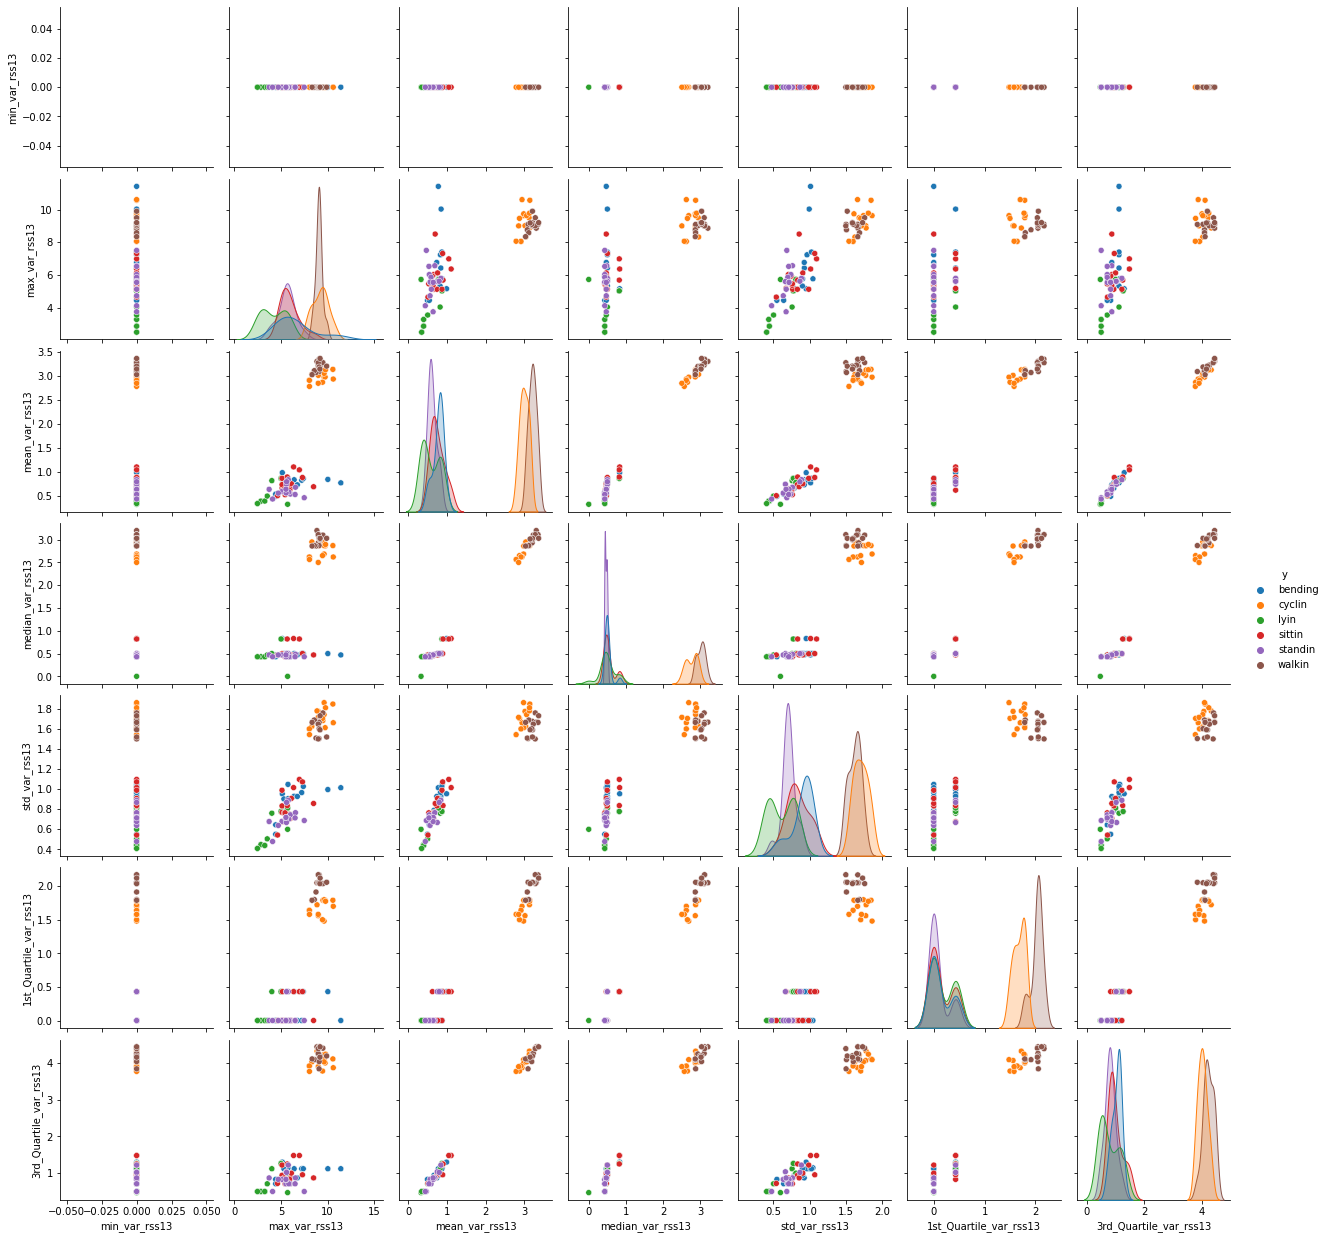

In [10]:
sns.pairplot(New_dataset_w_y,vars=New_dataset_w_y.columns[22:29], hue='y');

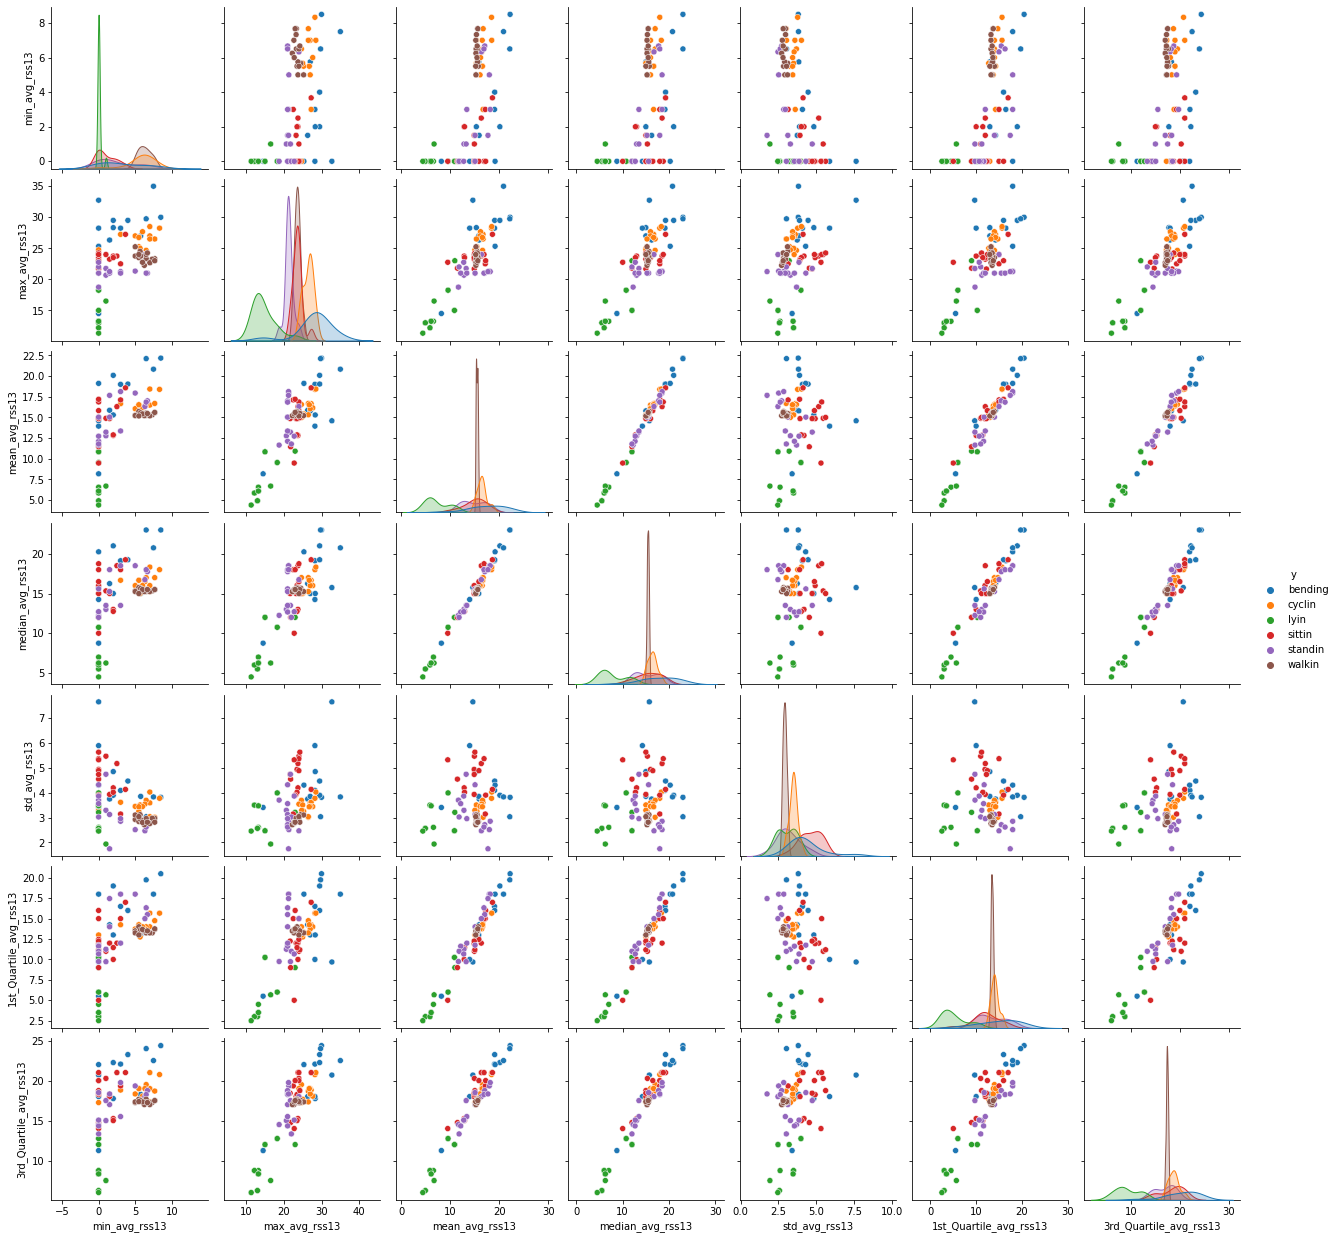

In [11]:
sns.pairplot(New_dataset_w_y,vars=New_dataset_w_y.columns[15:22], hue='y');

        Answer: These two plots above shows two columns of raw datasets from original files and their 
                time-domain features (Other 4 columns have a similar performance as these two, so I will use 
                them as an example.). We could know from the plots that the mean, median, 1st quartile and 
                3rd quartile are very linearly related, so it is reasonable to chose one of it. I would 
                chose Mean. 
                
                For the feature Min, it has a lot of points of zero, which is a nutural character when 
                recording time series, so the starting points of zero don't mean much when classifing. 
                
                As a result, I would select Max, Mean and STD as the time domin features. 

<center><font size="4">2. ISLR 3.7.4</font></center>

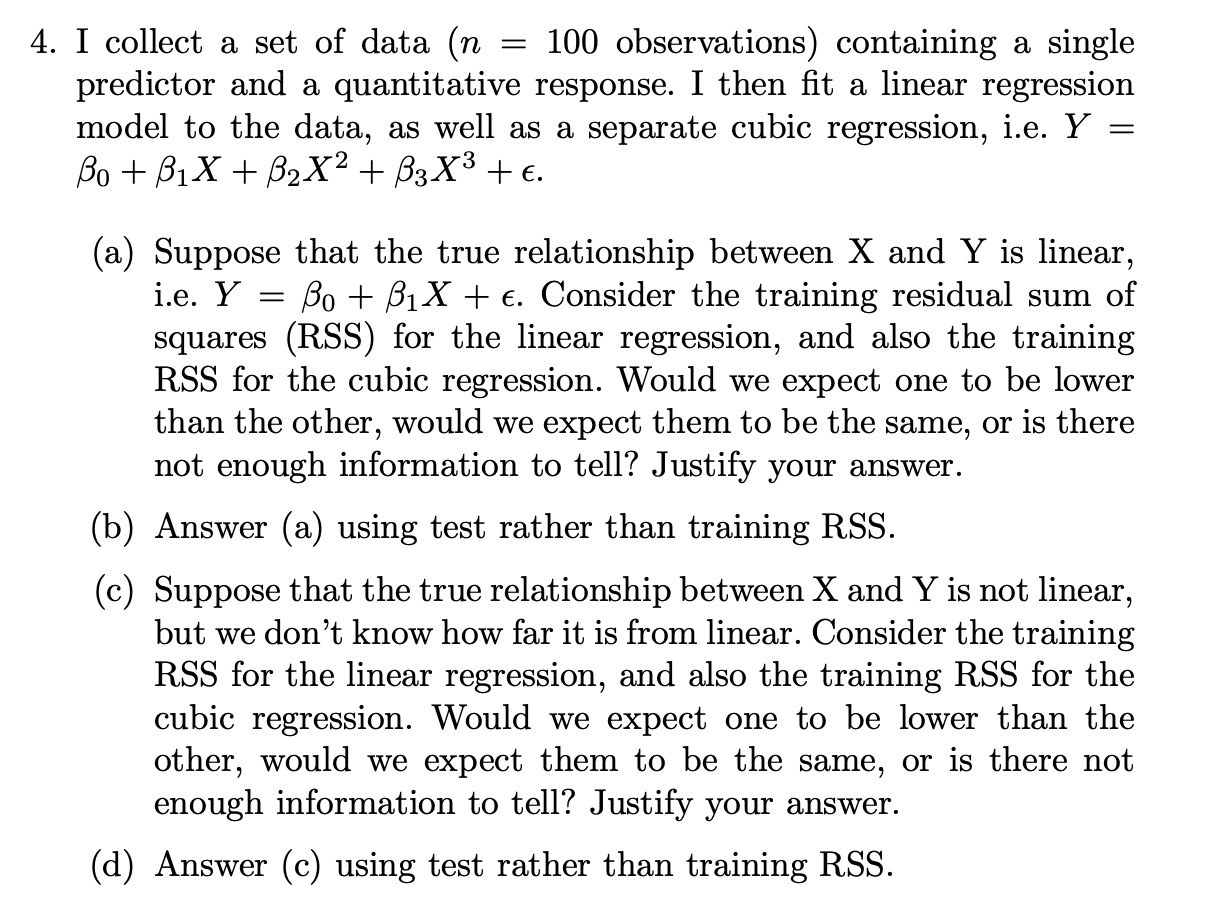

        Answer:
        
        (a). I think the RSS of cubic regression would be lower than linear regression. Because cubic regression 
             is a curve, when training it, ε, the random error will be overfitted into the model, which makes 
             the curve more closer to the training data points and makes the RSS smaller than linear. 
        
        (b). I think the RSS of cubic regression would be higher than linear regression. Because the true model 
             is linear, the random error for linear of testing dataset will be in a similar range as ε. However, 
             if we test it with the cubic model, the random error will be out of the range of ε, which makes 
             the RSS larger. 
             
        (c). I think the RSS of cubic regression would be lower than linear regression. Even though the model 
             was linear, the cubic has a lower RSS. For cubic regression, which is more flexible, the trained 
             model line will be more closer to each of the dataset points (even if the model is very close 
             to linear).
             
        (d). Not enough information. Because the true model is not linear, we dont have enough information about
             how the test data looks like. If the true regression is just slitely non-linear, the linear RSS for
             test data will be small. If the true model is far from linear, cubic will have lower RSS.